# Overview of Dataset

The dataset is available on Kaggle:

https://www.kaggle.com/datasets/zalando-research/fashionmnist

Fashion MNIST dataset consists of 70000 images divided into 60000 training and 10000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:

0 => T-shirt/top 

1 => Trouser 

2 => Pullover 

3 => Dress 

4 => Coat 

5 => Sandal 

6 => Shirt 

7 => Sneaker 

8 => Bag 

9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

# Import Required Libraries

In [1]:
import pandas as pd                # is used for data manipulation by dataframes (similar to Excel)
import numpy as np                 # is used for linear algebra
import matplotlib.pyplot as plt    # is used for plotting and visualization
import seaborn as sns              # is used for statistical visualizations

import random

from sklearn.model_selection import train_test_split


# An open source neural network library is called Keras
# We can build CNN in just 10 to 12 lines of code.

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# from keras.optimizer_v2 import adam     #adam.Adam(...);
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Exploring the Dataset

In [2]:
fashion_train = pd.read_csv('Data/fashion-mnist_train.csv')
fashion_test = pd.read_csv('Data/fashion-mnist_test.csv')

In [3]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
fashion_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [7]:
# Create training matrix
training = np.array(fashion_train, dtype = 'float32')

# Create testing matrix
testing = np.array(fashion_test, dtype = 'float32')

3.0


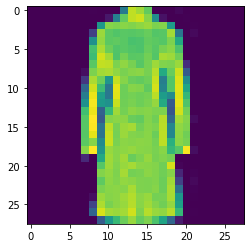

In [8]:
# Visualize one image
plt.imshow(training[76, 1:].reshape(28, 28))
label = training[76, 0]
print(label)

3.0


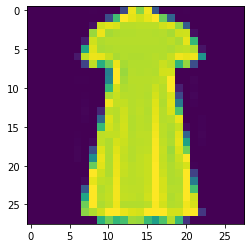

In [9]:
# Try visualization by generating some random value
# The 10 classes are as follows:
# 0 => T-shirt/top 
# 1 => Trouser 
# 2 => Pullover 
# 3 => Dress 
# 4 => Coat 
# 5 => Sandal
# 6 => Shirt 
# 7 => Sneaker 
# 8 => Bag 
# 9 => Ankle boot

r = random.randint(1, 60000)
plt.imshow(training[r, 1:].reshape(28, 28))
label = training[r, 0]
print(label)

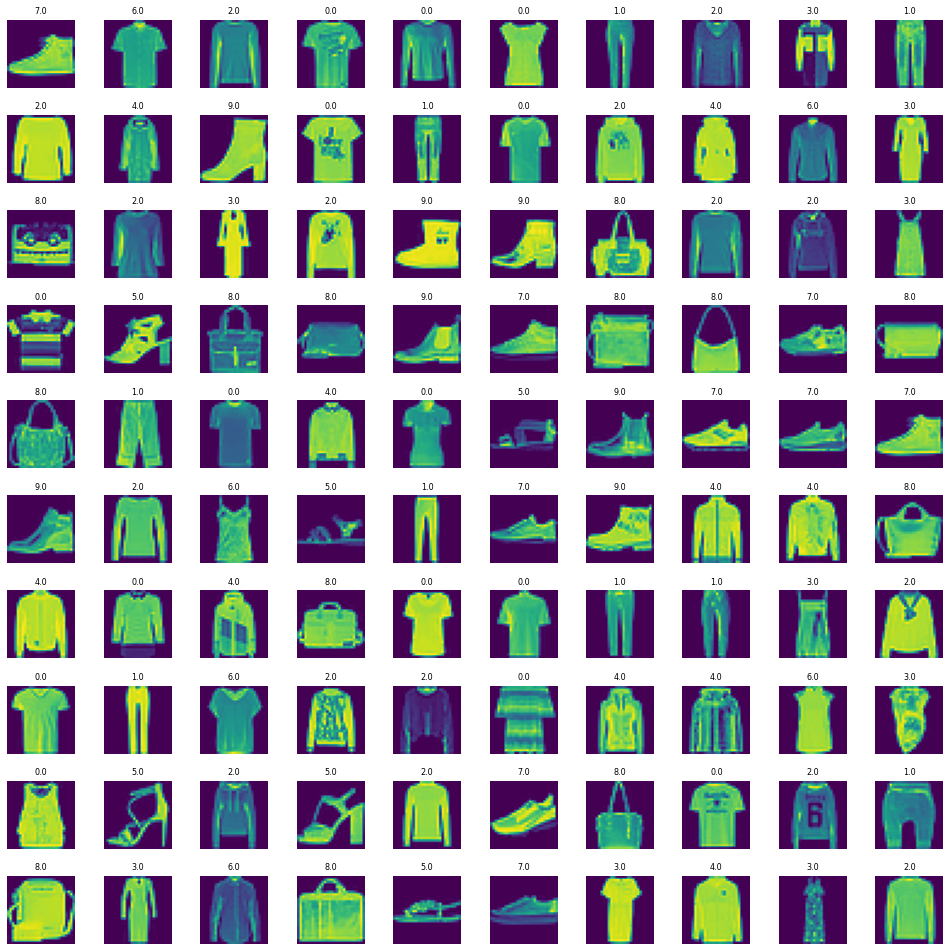

In [10]:
# Visualize the data in a matrix format

# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot returns the figure object ad axes object
# we can use the axes object to  plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))
axes = axes.ravel() # flaten the 10 * 10 matrix into 100 array

n_training = len(training)

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # Create evenly spaces variables
    # Select a random number
    index = np.random.randint(0, n_training)
    # Read and display an event with the selected index
    axes[i].imshow(training[index, 1:].reshape((28, 28)))
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

# Prepare Train, Test And Validation Dataset

In [11]:
X_train = training[:, 1:]/255 # Just do a kind of normalization
y_train = training[:, 0]

X_test = testing[:, 1:]/255 # Just do a kind of normalization
y_test = testing[:, 0]

In [12]:
# We need to develop or use a dataset that is called validation dataset.
# It is a kind of dataset that is used during training but it can be used to help the model generalize.

# Simply we want the model to avoid overfitting. 
# So we need to do the validation dataset every once in a while to actually validate that we are heading and the model is actually generalizing as we go.


In [13]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [14]:
# Prepare data in a format that CNN could accept that
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [15]:
# We have 48000 samples that each one is 28*28 pixels in greyscale.
X_train.shape

(48000, 28, 28, 1)

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_validate.shape

(12000, 28, 28, 1)

# Train The Model (Before)

In [18]:
cnn_model_before = Sequential()

# Firstly we add the convolutional layer. We are going to use Conv2D.
# Then we specify how many kernels/feature detectors we will use. (32)
# And the dimension of each feature detector is 3 by 3.
# input_shape / siz of our iage (28, 28, 1)
cnn_model_before.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))


# Next, we are hoing to add maxpooling layer.
cnn_model_before.add(MaxPooling2D(pool_size = (2, 2)))

# Next, we want to flatten our model.
# We want to flat our features into one single array so that we can feed it to our fullly connected artificial neural network.
cnn_model_before.add(Flatten())


# Next, we are going to add our dense function. We need to specify our dimensions.
cnn_model_before.add(Dense(units = 32, activation = 'relu'))  # Hidden Layer
cnn_model_before.add(Dense(units = 10, activation = 'relu'))  # Output Layer

In [19]:
cnn_model_before.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = Adam(learning_rate = 0.001),
                  metrics = ['accuracy'])

In [20]:
# Fit our model
# epochs: how many times we are going to present our data and update the weights.

cnn_model_before.fit(X_train,
                     y_train, 
                     epochs = 50,
                     batch_size = 512,
                     verbose = 1,
                     validation_data = (X_validate, y_validate)
                    )

Epoch 1/50
94/94 [==============================] - 2s 19ms/step - loss: 3.2417 - accuracy: 0.2695 - val_loss: 1.2812 - val_accuracy: 0.5726
Epoch 2/50
94/94 [==============================] - 1s 11ms/step - loss: 1.4128 - accuracy: 0.4819 - val_loss: 1.1364 - val_accuracy: 0.6528
Epoch 3/50
94/94 [==============================] - 1s 12ms/step - loss: 1.2890 - accuracy: 0.5788 - val_loss: 1.0923 - val_accuracy: 0.6661
Epoch 4/50
94/94 [==============================] - 1s 12ms/step - loss: 1.0940 - accuracy: 0.6823 - val_loss: 1.0134 - val_accuracy: 0.6922
Epoch 5/50
94/94 [==============================] - 1s 12ms/step - loss: 1.0312 - accuracy: 0.6875 - val_loss: 1.1037 - val_accuracy: 0.6922
Epoch 6/50
94/94 [==============================] - 1s 11ms/step - loss: 0.9694 - accuracy: 0.7273 - val_loss: 0.9359 - val_accuracy: 0.6842
Epoch 7/50
94/94 [==============================] - 1s 12ms/step - loss: 0.9052 - accuracy: 0.7371 - val_loss: 0.9822 - val_accuracy: 0.7537
Epoch 8/50
94

# Evaluate The Model (Before)

In [21]:
evaluation_before = cnn_model_before.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation_before[1]))

313/313 [==============================] - 0s 888us/step - loss: 2.3019 - accuracy: 0.1003
Test Accuracy : 0.100


In [22]:
predict_x_before = cnn_model_before.predict(X_test)
predicted_classes_before = np.argmax(predict_x_before, axis=1)

In [23]:
predicted_classes_before

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

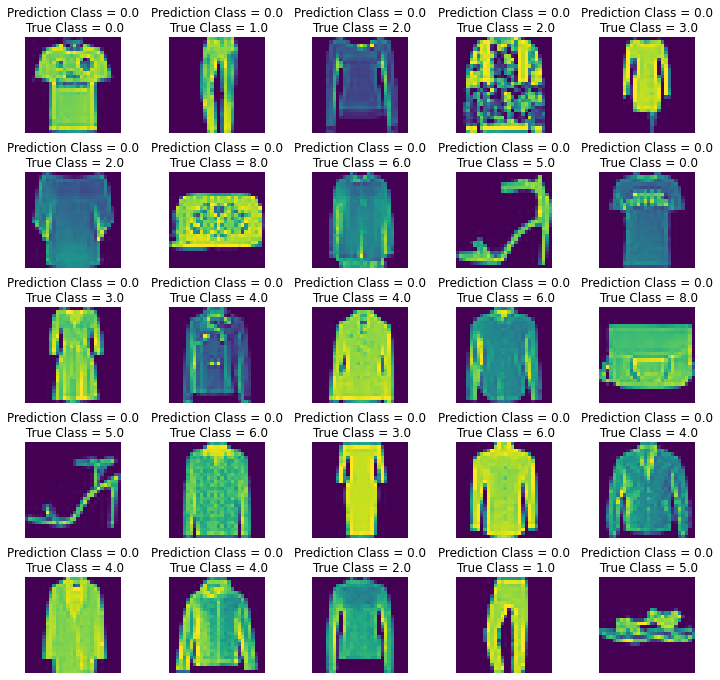

In [24]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes_before[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


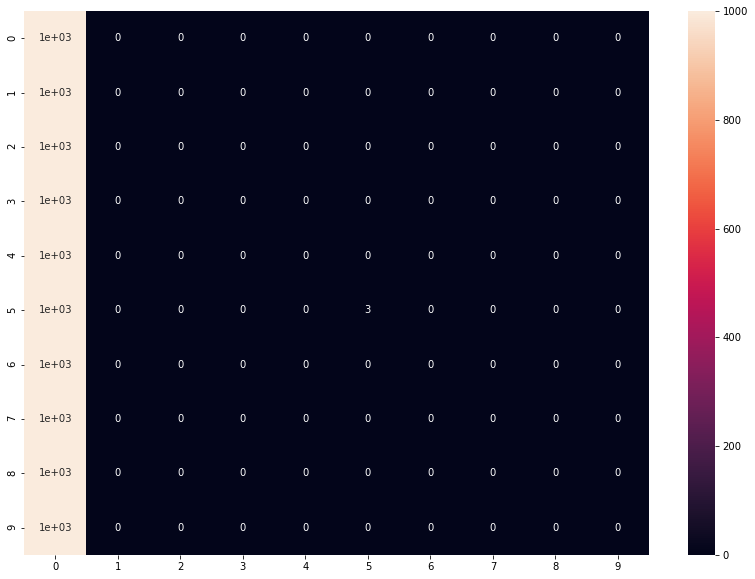

In [25]:
cm = confusion_matrix(y_test, predicted_classes_before)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [26]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes_before, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.10      1.00      0.18      1000
     Class 1       0.00      0.00      0.00      1000
     Class 2       0.00      0.00      0.00      1000
     Class 3       0.00      0.00      0.00      1000
     Class 4       0.00      0.00      0.00      1000
     Class 5       1.00      0.00      0.01      1000
     Class 6       0.00      0.00      0.00      1000
     Class 7       0.00      0.00      0.00      1000
     Class 8       0.00      0.00      0.00      1000
     Class 9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.11      0.10      0.02     10000
weighted avg       0.11      0.10      0.02     10000



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Improving The Model (Adding More Feature Detectors)

In [27]:
cnn_model_after = Sequential()

cnn_model_after.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model_after.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model_after.add(Flatten())

cnn_model_after.add(Dense(units = 32, activation = 'relu'))
cnn_model_after.add(Dense(units = 10, activation = 'sigmoid'))

In [28]:
cnn_model_after.compile(loss ='sparse_categorical_crossentropy', 
                        optimizer=Adam(learning_rate=0.001),
                        metrics =['accuracy'])

In [29]:
cnn_model_after.fit(X_train,
                    y_train,
                    batch_size = 512,
                    epochs = 50,
                    verbose = 1,
                    validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 2s 21ms/step - loss: 1.8148 - accuracy: 0.3733 - val_loss: 0.7695 - val_accuracy: 0.7272
Epoch 2/50
94/94 [==============================] - ETA: 0s - loss: 0.7148 - accuracy: 0.74 - 2s 20ms/step - loss: 0.7143 - accuracy: 0.7446 - val_loss: 0.6027 - val_accuracy: 0.7816
Epoch 3/50
94/94 [==============================] - 2s 21ms/step - loss: 0.5851 - accuracy: 0.7871 - val_loss: 0.5442 - val_accuracy: 0.8040
Epoch 4/50
94/94 [==============================] - 2s 21ms/step - loss: 0.5317 - accuracy: 0.8083 - val_loss: 0.5058 - val_accuracy: 0.8198
Epoch 5/50
94/94 [==============================] - 2s 19ms/step - loss: 0.4974 - accuracy: 0.8208 - val_loss: 0.4848 - val_accuracy: 0.8243
Epoch 6/50
94/94 [==============================] - 2s 20ms/step - loss: 0.4720 - accuracy: 0.8288 - val_loss: 0.4665 - val_accuracy: 0.8346
Epoch 7/50
94/94 [==============================] - 2s 20ms/step - loss: 0.4573 - accuracy: 0.8342 - val_loss: 0

### Evaluate After Improving

In [30]:
evaluation_after = cnn_model_after.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation_after[1]))

313/313 [==============================] - 0s 886us/step - loss: 0.3198 - accuracy: 0.8807
Test Accuracy : 0.881


In [31]:
predict_x_after = cnn_model_after.predict(X_test)
predicted_classes_after = np.argmax(predict_x_after, axis=1)

In [32]:
predicted_classes_after

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

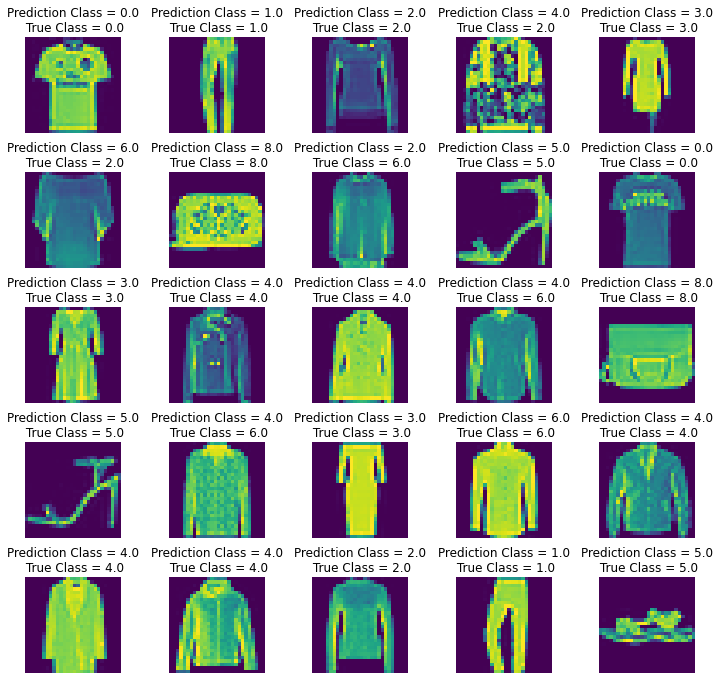

In [33]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes_after[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

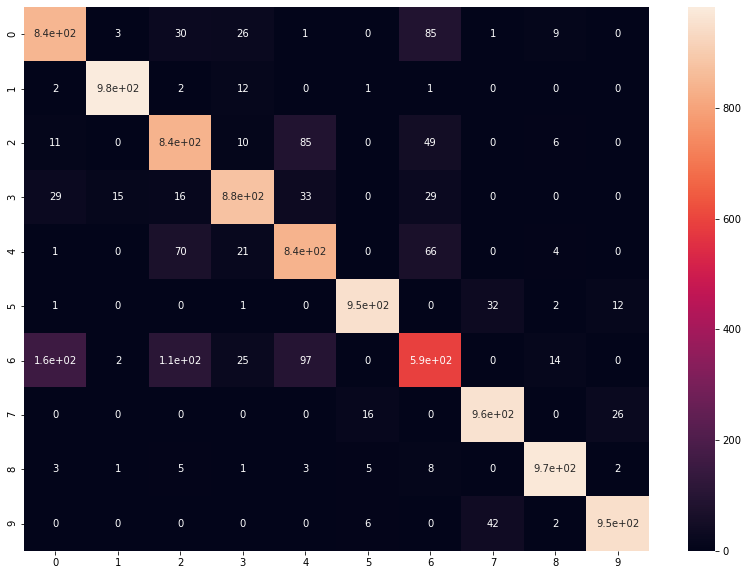

In [34]:
cm = confusion_matrix(y_test, predicted_classes_after)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [35]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes_after, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.84      0.82      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.78      0.84      0.81      1000
     Class 3       0.90      0.88      0.89      1000
     Class 4       0.79      0.84      0.81      1000
     Class 5       0.97      0.95      0.96      1000
     Class 6       0.71      0.59      0.65      1000
     Class 7       0.93      0.96      0.94      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Improving The Model (Adding a Dropout to the Previous Model)¶

In [36]:
cnn_model_after = Sequential()

cnn_model_after.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model_after.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model_after.add(Flatten())

cnn_model_after.add(Dropout(0.25))

cnn_model_after.add(Dense(units = 32, activation = 'relu'))
cnn_model_after.add(Dense(units = 10, activation = 'sigmoid'))

In [37]:
cnn_model_after.compile(loss ='sparse_categorical_crossentropy', 
                        optimizer=Adam(learning_rate=0.001),
                        metrics =['accuracy'])

In [38]:
cnn_model_after.fit(X_train,
                    y_train,
                    batch_size = 512,
                    epochs = 50,
                    verbose = 1,
                    validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 3s 29ms/step - loss: 1.7415 - accuracy: 0.4051 - val_loss: 0.6870 - val_accuracy: 0.7533
Epoch 2/50
94/94 [==============================] - 3s 28ms/step - loss: 0.6704 - accuracy: 0.7573 - val_loss: 0.5711 - val_accuracy: 0.7966
Epoch 3/50
94/94 [==============================] - 3s 29ms/step - loss: 0.5685 - accuracy: 0.7926 - val_loss: 0.5155 - val_accuracy: 0.8145
Epoch 4/50
94/94 [==============================] - 2s 24ms/step - loss: 0.5279 - accuracy: 0.8098 - val_loss: 0.4861 - val_accuracy: 0.8244
Epoch 5/50
94/94 [==============================] - 2s 23ms/step - loss: 0.5047 - accuracy: 0.8166 - val_loss: 0.4712 - val_accuracy: 0.8272
Epoch 6/50
94/94 [==============================] - 2s 24ms/step - loss: 0.4949 - accuracy: 0.8195 - val_loss: 0.4535 - val_accuracy: 0.8347
Epoch 7/50
94/94 [==============================] - 2s 25ms/step - loss: 0.4668 - accuracy: 0.8299 - val_loss: 0.4414 - val_accuracy: 0.8382
Epoch 8/50
94

### Evaluate After Improving

In [39]:
evaluation_after = cnn_model_after.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation_after[1]))

313/313 [==============================] - 0s 933us/step - loss: 0.3304 - accuracy: 0.8769
Test Accuracy : 0.877


# Conclusion

### As we can see, the best result is generated after increasing the number of feature detectors to 64.

# Good Luck ^-^